In [ ]:
# naver에서 주식 정보를 가지고 올때 필요한 라이브러리
import time
import requests      
from bs4 import BeautifulSoup

import pandas as pd 
import numpy as np
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras 
# 전처리
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 간단한 LSTM 예제
x = np.array( [[1,2,3], [2,3,4], [3,4,5], [4,5,6], [5,6,7],
               [6,7,8], [7,8,9], [8,9,10], [9,10,11],[10,11,12],
               [20,30,40], [30,40,50], [40,50,60] 
               ]     )
y = np.array([4,5,6,7,8,9,10,11,12,13,50,60,70])

In [ ]:
x.shape, y.shape

((13, 3), (13,))

In [ ]:
# (데이터수, 타임스텝, 컬럼수) -> 
x = x.reshape((13,3,1))

In [ ]:
x.shape # 예시를 주식 데이터로들면 x.shape ->(데이터수, 며칠을 고려할것인가, 데이터컬럼(시가,저가,고가,거래량)) y.shape -> (종가,)

(13, 3, 1)

In [ ]:
model = keras.Sequential([
    keras.layers.LSTM(20, activation="relu", input_shape=(3,1)),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer="adam",
    loss = "mse"
)

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='loss', patience=500)
model.fit(x,y, epochs=1000, batch_size=1, verbose=0, callbacks=[es])

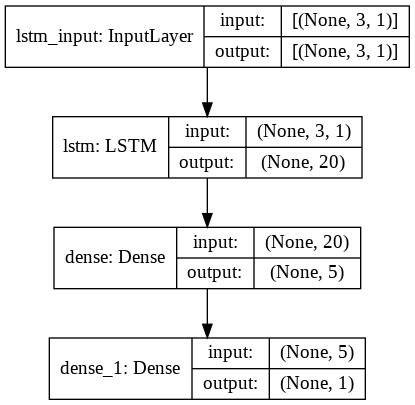

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
x_test = np.array([25,35,45])
x_test = x_test.reshape((1,3,1))
pred = model.predict(x_test)
pred

array([[55.21393]], dtype=float32)

In [ ]:
# 네이버에서 주가 데이터 가져오기
# 주가 데이터를 저장할 DataFrame
stock_price = pd.DataFrame()

In [ ]:
stock_number = "035720"
pages = 70

In [ ]:
for page in range(1, pages+1):
    url = f'https://finance.naver.com/item/sise_day.nhn?code={stock_number}&page={page}'
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
    response = requests.get(url, headers=headers)
    # 혹시 block 당할까봐 0.5초 단위로 가져올게요
    # time.sleep(0.5)
    html = BeautifulSoup(response.text, "lxml")

    table = html.select("table")
    juga = pd.read_html(str(table))
    juga = juga[0].dropna()
    stock_price = pd.concat([stock_price, juga], axis=0)

In [ ]:
stock_price.head()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.08.20,144000.0,2500.0,146500.0,149000.0,143000.0,2763109.0
2,2021.08.19,146500.0,1000.0,144000.0,149000.0,144000.0,2813914.0
3,2021.08.18,145500.0,3500.0,142000.0,146500.0,141500.0,2720552.0
4,2021.08.17,142000.0,4000.0,146000.0,147500.0,141000.0,3322347.0
5,2021.08.13,146000.0,1500.0,147500.0,147500.0,144500.0,2285992.0


In [ ]:
stock_price.tail()

In [ ]:
# reset_index
stock_price = stock_price.reset_index(drop=True)
stock_price.tail()

,날짜,종가,전일비,시가,고가,저가,거래량
695,2018.10.30,90500.0,2900.0,86000.0,91100.0,86000.0,521229.0
696,2018.10.29,87600.0,3300.0,89900.0,92400.0,87200.0,599252.0
697,2018.10.26,90900.0,3300.0,95000.0,95500.0,89900.0,653419.0
698,2018.10.25,94200.0,5000.0,97300.0,97300.0,92000.0,1024715.0
699,2018.10.24,99200.0,1300.0,101000.0,101500.0,98900.0,312593.0


In [ ]:
# 데이터 저장
stock_price.to_pickle("카카오주가.pkl")

In [ ]:
# 원본 copy
stock_price_copy = stock_price.copy()

In [ ]:
# 날짜 -> datetime 형 변환
stock_price["날짜"] = pd.to_datetime(stock_price["날짜"])
type(stock_price["날짜"][0])

pandas._libs.tslibs.timestamps.Timestamp

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_te

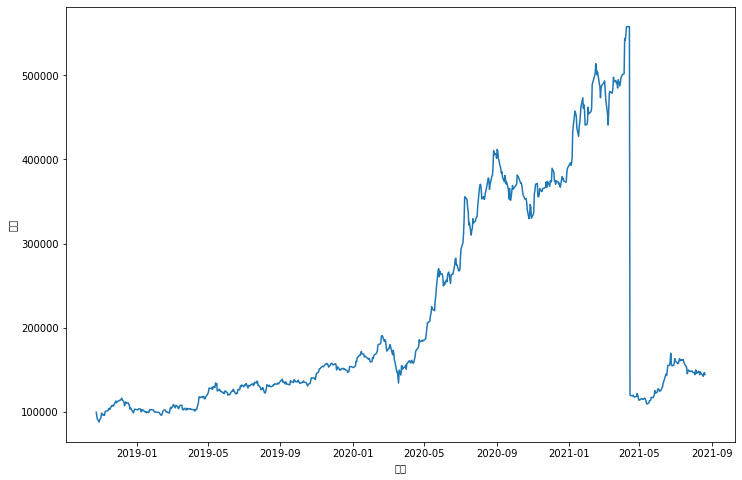

In [ ]:
# 데이터 시각화
plt.figure(figsize=(12,8))
sns.lineplot(x=stock_price["날짜"], y=stock_price["종가"])
plt.show()

In [ ]:
# minmax 적용 
scaler = MinMaxScaler()
scale_cols =["시가", "고가", "저가", "거래량"]
scaled = scaler.fit_transform(stock_price[scale_cols]) 

scaled_stock = pd.DataFrame(scaled)

In [ ]:
scaled_stock.columns = scale_cols
scaled_stock.head()

,시가,고가,저가,거래량
0,0.264440,0.265597,0.259528,0.150102
1,0.259928,0.265597,0.261343,0.152862
2,0.256318,0.261141,0.256806,0.147790
3,0.263538,0.262923,0.255898,0.180482
4,0.266245,0.262923,0.262250,0.124183


In [ ]:
stock_price["종가"].head()

0    143500.0
1    146500.0
2    145500.0
3    142000.0
4    146000.0
Name: 종가, dtype: float64

In [ ]:
# 종가 log scale
end_price = np.log1p(stock_price["종가"])

In [ ]:
# np.expm1(end_price)[:5]

In [ ]:
# 종가 추가
scaled_stock["종가"] = end_price

In [ ]:
train = scaled_stock[:-30]
test = scaled_stock[-30:]

In [ ]:
train.shape, test.shape

((670, 5), (30, 5))

In [ ]:
# window_size는 내가 얼마 동안의 주가데이터에 기반하여 다음날 종가를 예측할 것인가를 나타냄
def make_dataset(data, label, window_size):
    feature_list =[]
    label_list = []
    for i in range(len(data)-window_size):
        feature_list.append( np.array(data.iloc[i:i+window_size]) )
        label_list.append( np.array(label.iloc[i+window_size]) )
    return np.array(feature_list), np.array(label_list)

In [ ]:
# 데이터셋 만들고 분리하기
train_feature = train[["시가","고가","저가","거래량"]]
train_label = train[["종가"]]

test_feature = test[["시가","고가","저가","거래량"]]
test_label = test[["종가"]]

# train_dataset
train_feature, train_label = make_dataset(train_feature, train_label, 10)

# train, validation set, (x,y test_size, random_state)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2, random_state=123)

# test dataet (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 10)

In [ ]:
# train shape 찍어보기
train_feature.shape, test_label.shape

((660, 10, 4), (20, 1))

In [ ]:
# LSTM 모델 만들기
model = keras.Sequential([
    keras.layers.LSTM(16, input_shape=(10,4), activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
# 모델 컴파일
model.compile(
    optimizer="adam",
    loss="mse",
    metrics =["mae"]
)

In [ ]:
# 하이퍼 파라미터 셋팅
EPOCH = 500
BATCH_SIZE = 64

es = keras.callbacks.EarlyStopping(monitor="val_loss", patience=7)
cp = keras.callbacks.ModelCheckpoint("predict_kakao.h5", monitor="val_loss", save_best_only=True)

In [ ]:
# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    validation_data=(x_valid, y_valid),
    callbacks=[es, cp]
)

Epoch 1/500
9/9 [==============================] - 2s 39ms/step - loss: 146.6254 - mae: 12.0986 - val_loss: 145.6644 - val_mae: 12.0595
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 145.1256 - mae: 12.0373 - val_loss: 143.8793 - val_mae: 11.9863
Epoch 3/500
9/9 [==============================] - 0s 8ms/step - loss: 143.0819 - mae: 11.9535 - val_loss: 141.5224 - val_mae: 11.8891
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 140.2416 - mae: 11.8360 - val_loss: 138.0495 - val_mae: 11.7443
Epoch 5/500
9/9 [==============================] - 0s 8ms/step - loss: 135.6041 - mae: 11.6412 - val_loss: 131.7030 - val_mae: 11.4735
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 125.3477 - mae: 11.1892 - val_loss: 114.5423 - val_mae: 10.6801
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 97.5603 - mae: 9.6624 - val_loss: 75.6342 - val_mae: 8.1788
Epoch 8/500
9/9 [==============================] - 0s 8ms/

In [ ]:
# 최고의 모델을 가져와서 test
loaded_models = keras.models.load_model("predict_kakao.h5")

In [ ]:
# 예측
pred = loaded_models.predict(test_feature)

In [ ]:
# 원래 값으로 복원
pred = np.expm1(pred)

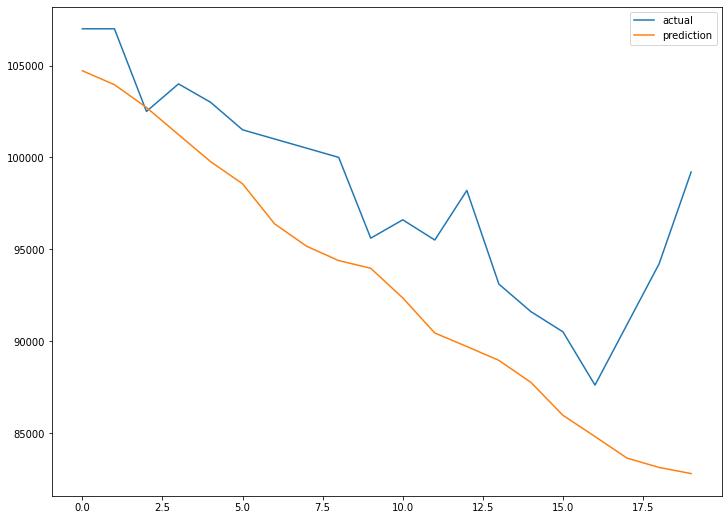

In [ ]:
# 결과값 시각화
plt.figure(figsize=(12,9))
plt.plot(np.expm1(test_label), label="actual")
plt.plot(pred, label="prediction")
plt.legend()
plt.show()